## ***Exploratory Data Analysis for happiness data***

This notebook performs an Exploratory data analysis (EDA) and preprocessing of the World Happiness Report datasets from 2015 to 2019. The main goal is to understand the structure and quality of the data, clean and harmonize the datasets, analize and prepare them for machine learning tasks.

To start with this EDA I need to import the necessary libraries to develop this notebook.

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_regression

The working directory is changed so that the system can locate the datasets.

In [2]:
os.chdir("../")
print(os.getcwd())

/home/v4lentin4/etl_workshop003


Now, read all the datasets, each in its own DataFrame

In [3]:
df_2015 = pd.read_csv("data/2015.csv")
df_2016 = pd.read_csv("data/2016.csv")
df_2017 = pd.read_csv("data/2017.csv")
df_2018 = pd.read_csv("data/2018.csv")
df_2019 = pd.read_csv("data/2019.csv")

## ***Preliminar Data Exploration***

What I'm looking for first is to explore the datasets to merge and analyze centralized and orderly data.

The exploration process planned includes:

- Examination of column names across datasets
- Standardization of column names to lowercase
- Dataset validation:
    - Record count
    - Column count
    - Null value analysis
    - Data type verification
- Statistical analysis of numerical variables
- Duplicate record detection

This systematic analysis was performed on each DataFrame to decide the subsequent data merging strategy.

#### ***2015***

In [4]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df_2015.columns = df_2015.columns.str.lower()

In [6]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        158 non-null    object 
 1   region                         158 non-null    object 
 2   happiness rank                 158 non-null    int64  
 3   happiness score                158 non-null    float64
 4   standard error                 158 non-null    float64
 5   economy (gdp per capita)       158 non-null    float64
 6   family                         158 non-null    float64
 7   health (life expectancy)       158 non-null    float64
 8   freedom                        158 non-null    float64
 9   trust (government corruption)  158 non-null    float64
 10  generosity                     158 non-null    float64
 11  dystopia residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df_2015.describe()

,happiness rank,happiness score,standard error,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
print(f"Number of duplicates: {df_2015.duplicated(subset ='country').sum()}")

Number of duplicates: 0


### ***2016***

In [9]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [10]:
df_2016.columns = df_2016.columns.str.lower()

In [11]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        157 non-null    object 
 1   region                         157 non-null    object 
 2   happiness rank                 157 non-null    int64  
 3   happiness score                157 non-null    float64
 4   lower confidence interval      157 non-null    float64
 5   upper confidence interval      157 non-null    float64
 6   economy (gdp per capita)       157 non-null    float64
 7   family                         157 non-null    float64
 8   health (life expectancy)       157 non-null    float64
 9   freedom                        157 non-null    float64
 10  trust (government corruption)  157 non-null    float64
 11  generosity                     157 non-null    float64
 12  dystopia residual              157 non-null    flo

In [12]:
df_2016.describe()

,happiness rank,happiness score,lower confidence interval,upper confidence interval,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [13]:
print(f"Number of duplicates: {df_2016.duplicated(subset ='country').sum()}")

Number of duplicates: 0


### ***2017***

In [14]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [15]:
df_2017.columns = df_2017.columns.str.lower()

In [16]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        155 non-null    object 
 1   happiness.rank                 155 non-null    int64  
 2   happiness.score                155 non-null    float64
 3   whisker.high                   155 non-null    float64
 4   whisker.low                    155 non-null    float64
 5   economy..gdp.per.capita.       155 non-null    float64
 6   family                         155 non-null    float64
 7   health..life.expectancy.       155 non-null    float64
 8   freedom                        155 non-null    float64
 9   generosity                     155 non-null    float64
 10  trust..government.corruption.  155 non-null    float64
 11  dystopia.residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [17]:
df_2017.describe()

,happiness.rank,happiness.score,whisker.high,whisker.low,economy..gdp.per.capita.,family,health..life.expectancy.,freedom,generosity,trust..government.corruption.,dystopia.residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [18]:
print(f"Number of duplicates: {df_2017.duplicated(subset ='country').sum()}")

Number of duplicates: 0


### ***2018***

In [19]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [20]:
df_2018.columns = df_2018.columns.str.lower()

In [21]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall rank                  156 non-null    int64  
 1   country or region             156 non-null    object 
 2   score                         156 non-null    float64
 3   gdp per capita                156 non-null    float64
 4   social support                156 non-null    float64
 5   healthy life expectancy       156 non-null    float64
 6   freedom to make life choices  156 non-null    float64
 7   generosity                    156 non-null    float64
 8   perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [22]:
df_2018.describe()

,overall rank,score,gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [23]:
print(f"Number of duplicates: {df_2018.duplicated(subset ='country or region').sum()}")

Number of duplicates: 0


### ***2019***

In [24]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [25]:
df_2019.columns = df_2019.columns.str.lower()

In [26]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall rank                  156 non-null    int64  
 1   country or region             156 non-null    object 
 2   score                         156 non-null    float64
 3   gdp per capita                156 non-null    float64
 4   social support                156 non-null    float64
 5   healthy life expectancy       156 non-null    float64
 6   freedom to make life choices  156 non-null    float64
 7   generosity                    156 non-null    float64
 8   perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [27]:
df_2019.describe()

,overall rank,score,gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [28]:
print(f"Number of duplicates: {df_2019.duplicated(subset ='country or region').sum()}")

Number of duplicates: 0


## ***Merge***

The previous analysis revealed:

- Common columns across datasets with varying naming conventions
- Dataset-specific columns such as region, dystopia residual, and standard deviation

This details are going to be taken into account to perform the merge

First, eliminate columns that are not in every dataset and cannot be imputed or just have little significance for the analysis.

In [29]:
df_2015= df_2015.drop(columns=["happiness rank", "standard error", "dystopia residual"])
df_2016= df_2016.drop(columns=["happiness rank", "lower confidence interval", "upper confidence interval", "dystopia residual"])
df_2017= df_2017.drop(columns=["happiness.rank", "whisker.high", "whisker.low", "dystopia.residual"])
df_2018= df_2018.drop(columns="overall rank")
df_2019= df_2019.drop(columns="overall rank")

Standardization of column names across all DataFrames

In [30]:
rename_dict = {
    "country or region": "country",
    "score": "happiness_score",
    "happiness score": "happiness_score",
    "happiness.score": "happiness_score",
    "economy (gdp per capita)": "gdp_per_capita",
    "gdp per capita": "gdp_per_capita",
    "economy..gdp.per.capita.": "gdp_per_capita",
    "family": "social_support",
    "social support": "social_support",
    "health (life expectancy)": "healthy_life_expectancy",
    "healthy life expectancy": "healthy_life_expectancy",
    "health..life.expectancy.": "healthy_life_expectancy",
    "freedom to make life choices": "freedom",
    "trust (government corruption)": "perceptions_of_corruption",
    "trust..government.corruption.": "perceptions_of_corruption",
    "perceptions of corruption":"perceptions_of_corruption"
}

df_2015 = df_2015.rename(columns=rename_dict)
df_2016 = df_2016.rename(columns=rename_dict)
df_2017 = df_2017.rename(columns=rename_dict)
df_2018 = df_2018.rename(columns=rename_dict)
df_2019 = df_2019.rename(columns=rename_dict)

In [31]:
print("Updated Column Names:")
print(df_2015.columns.tolist())

Updated Column Names:
['country', 'region', 'happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom', 'perceptions_of_corruption', 'generosity']


In [32]:
print("Updated Column Names:")
print(df_2017.columns.tolist())

Updated Column Names:
['country', 'happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom', 'generosity', 'perceptions_of_corruption']


Addition of a year column for potential happiness score correlation analysis

In [33]:
df_2015["year"] = 2015
df_2016["year"] = 2016
df_2017["year"] = 2017
df_2018["year"] = 2018
df_2019["year"] = 2019

After performing the necessary steps to ensure a successful merge I proceed with it

In [34]:
dataframes = [df_2015, df_2016, df_2017, df_2018, df_2019]
df = pd.concat(dataframes)
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,NaN,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,NaN,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,NaN,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,NaN,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    782 non-null    object 
 1   region                     315 non-null    object 
 2   happiness_score            782 non-null    float64
 3   gdp_per_capita             782 non-null    float64
 4   social_support             782 non-null    float64
 5   healthy_life_expectancy    782 non-null    float64
 6   freedom                    782 non-null    float64
 7   perceptions_of_corruption  781 non-null    float64
 8   generosity                 782 non-null    float64
 9   year                       782 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 67.2+ KB


## ***Model training oriented Exploratory Data Analysis***

Before making plots and charts, the data is cleaned to ensure the visualizations and analysis are made with precise information

### ***Data standarization and cleaning***

Extract countries and regions from df_2015 and df_2016 to impute region in the merged DataFrame.

In [36]:
df_region = pd.concat([df_2015, df_2016])
df_region = df_region[["country", "region"]]

Standarize names in country and region to ensure low data loss when imputing

In [37]:
df_region["country"] = df_region["country"].str.lower()
df_region["region"] = df_region["region"].str.lower()
df_region = df_region.groupby('country', as_index=False).agg({'region': 'first'})
df["country"] = df["country"].str.lower()
df["region"] = df["region"].str.lower()

Extract countries that appear fewer than five times in the dataset to verify why they are not consistently present across all provided datasets.

In [38]:
country_counts = df['country'].value_counts()

rare_countries = country_counts[country_counts < 5].index

df_rare = df[df['country'].isin(rare_countries)]

In [39]:
df_rare['count'] = df_rare['country'].map(country_counts)

df_rare = df_rare[["country", "count"]]

df_rare = df_rare.groupby('country').size().reset_index(name='count')

df_rare.sort_values(by="count", ascending= False)

/tmp/ipykernel_89704/3452083110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rare['count'] = df_rare['country'].map(country_counts)


,country,count
0,angola,4
2,central african republic,4
10,macedonia,4
6,hong kong,4
11,mozambique,4
8,laos,4
9,lesotho,4
24,taiwan,4
20,south sudan,4
21,sudan,4


Several countries in the dataset appear fewer than five times, which may reflect limitations in data availability due to political instability, lack of consistent surveying, or other logistical challenges. Additionally, some entries correspond to the same country under different names (e.g., “North Macedonia” vs. “Macedonia”, or “Trinidad and Tobago” vs. “Trinidad & Tobago”), indicating a need for name normalization. Regions with disputed status or special political conditions, such as Taiwan, Somaliland Region, or Hong Kong, also show limited representation.

In [40]:
df_rare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  28 non-null     object
 1   count    28 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 580.0+ bytes


In [41]:
country_replacements = {
    'macedonia': 'north macedonia',
    'trinidad & tobago': 'trinidad and tobago',
    'taiwan province of china': 'taiwan',
    'north cyprus': 'northern cyprus',
    'hong kong s.a.r., china': 'hong kong'
}

Now, I apply country name normalization based on the previous findings to maximize data retention and ensure consistency across records

In [42]:
df['country'] = df['country'].replace(country_replacements)
df_region['country'] = df_region['country'].replace(country_replacements)

After completing the normalization process, I proceed to impute the region for each entry based on the corresponding country information available in the dataset.

In [43]:
df['region'] = df['country'].map(df_region.set_index('country')['region'])

In [44]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,year
count,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,782.000000
mean,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2016.993606
std,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,1.417364
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,2016.000000
50%,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2017.000000
75%,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2018.000000
max,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


In [45]:
df.describe(include="object")

,country,region
count,782,781
unique,164,10
top,switzerland,sub-saharan africa
freq,5,195


Verifying dataset Missing Values

In [46]:
print("\n==== Missing Values per Column: ====\n")
print(df.isnull().sum().sort_values(ascending = False))


==== Missing Values per Column: ====

region                       1
perceptions_of_corruption    1
country                      0
happiness_score              0
social_support               0
gdp_per_capita               0
healthy_life_expectancy      0
freedom                      0
generosity                   0
year                         0
dtype: int64


In [47]:
df.isnull()

df[df.isnull().any(axis=1)]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,year
19,united arab emirates,middle east and northern africa,6.774,2.096,0.776,0.670,0.284,NaN,0.186,2018
119,gambia,NaN,4.516,0.308,0.939,0.428,0.382,0.167,0.269,2019


After identifying columns with null values, the missing entries in 'Perceptions of Corruption' are imputed using the country-level median, while records with missing 'Region' values are dropped from the dataset.

In [48]:
df['perceptions_of_corruption'] = df.groupby('country')['perceptions_of_corruption'].transform(lambda x: x.fillna(x.median()))

In [49]:
df = df.dropna()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    781 non-null    object 
 1   region                     781 non-null    object 
 2   happiness_score            781 non-null    float64
 3   gdp_per_capita             781 non-null    float64
 4   social_support             781 non-null    float64
 5   healthy_life_expectancy    781 non-null    float64
 6   freedom                    781 non-null    float64
 7   perceptions_of_corruption  781 non-null    float64
 8   generosity                 781 non-null    float64
 9   year                       781 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 67.1+ KB


In [51]:
print(df.nunique())

country                      163
region                        10
happiness_score              715
gdp_per_capita               742
social_support               731
healthy_life_expectancy      704
freedom                      696
perceptions_of_corruption    636
generosity                   663
year                           5
dtype: int64


### ***Visulizations***

In [52]:
sorted_df = df.sort_values('happiness_score', ascending=False)

top_5 = sorted_df.head(5)
bottom_5 = sorted_df.tail(5)

##### ***Top 5 happiest countries***

/tmp/ipykernel_89704/257416275.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


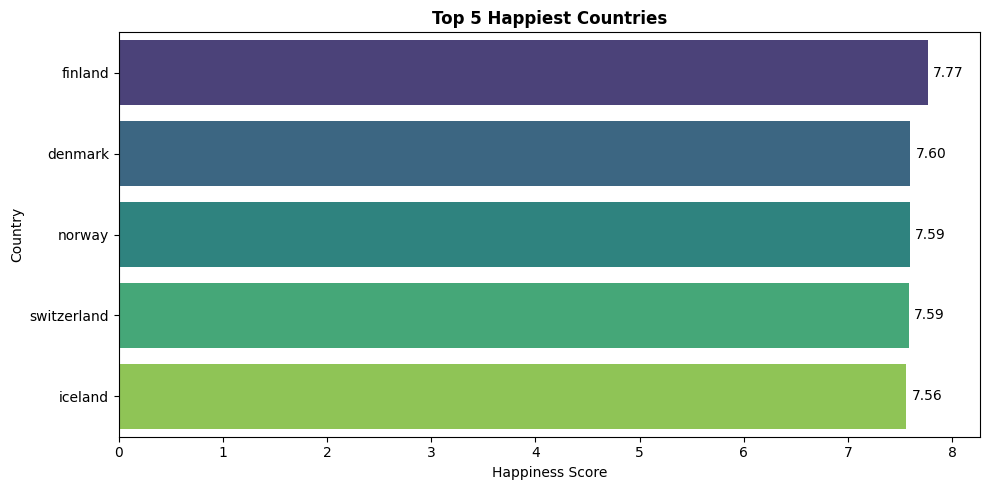

In [53]:

top_5 = df.sort_values(by='happiness_score', ascending=False)

top_5 = top_5.drop_duplicates(subset='country')

top_5 = top_5.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_5,
    x='happiness_score',
    y='country',
    palette='viridis'
)
plt.title('Top 5 Happiest Countries', fontweight='bold')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.xlim(0, top_5['happiness_score'].max() + 0.5)

for i, (score, country) in enumerate(zip(top_5['happiness_score'], top_5['country'])):
    plt.text(score + 0.05, i, f'{score:.2f}', va='center')

plt.tight_layout()
plt.show()


##### ***Top 5 least happy countries***

/tmp/ipykernel_89704/1539171104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


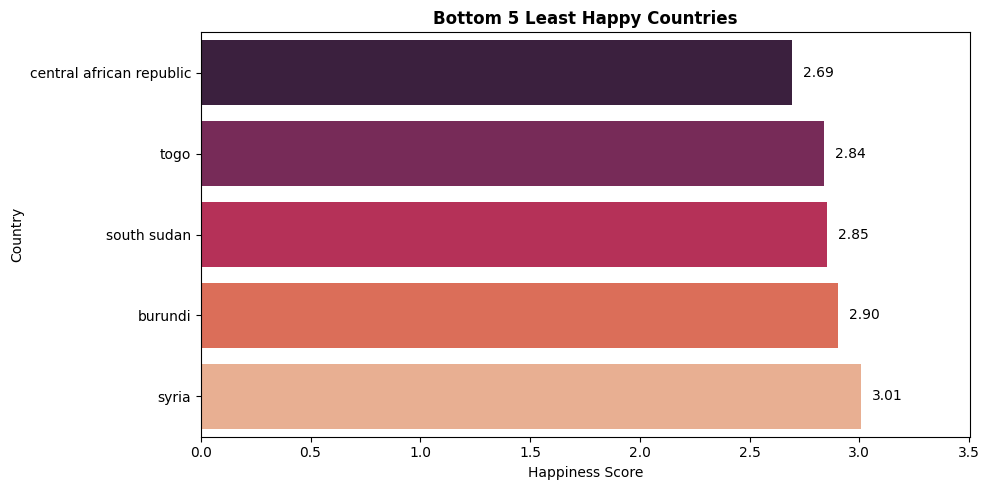

In [54]:
bottom_5 = df.sort_values(by='happiness_score', ascending=True)

bottom_5 = bottom_5.drop_duplicates(subset='country')

bottom_5 = bottom_5.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=bottom_5,
    x='happiness_score',
    y='country',
    palette='rocket'
)
plt.title('Bottom 5 Least Happy Countries', fontweight='bold')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.xlim(0, bottom_5['happiness_score'].max() + 0.5)

for i, (score, country) in enumerate(zip(bottom_5['happiness_score'], bottom_5['country'])):
    plt.text(score + 0.05, i, f'{score:.2f}', va='center')

plt.tight_layout()
plt.show()


The happiest countries—Finland (7.77), Denmark (7.60), Norway (7.59), Switzerland (7.59), and Iceland (7.56)—all have scores above 7.5, indicating high levels of well-being. In contrast, the least happy countries—Central African Republic (2.69), Togo (2.84), South Sudan (2.85), Burundi (2.90), and Syria (3.01)—score below 3.1, reflecting significant challenges to well-being. The gap between the highest (Finland, 7.77) and lowest (Central African Republic, 2.69) scores is 5.08, highlighting a stark global disparity in happiness.

##### ***Numeric columns distributions accross happiness_score***

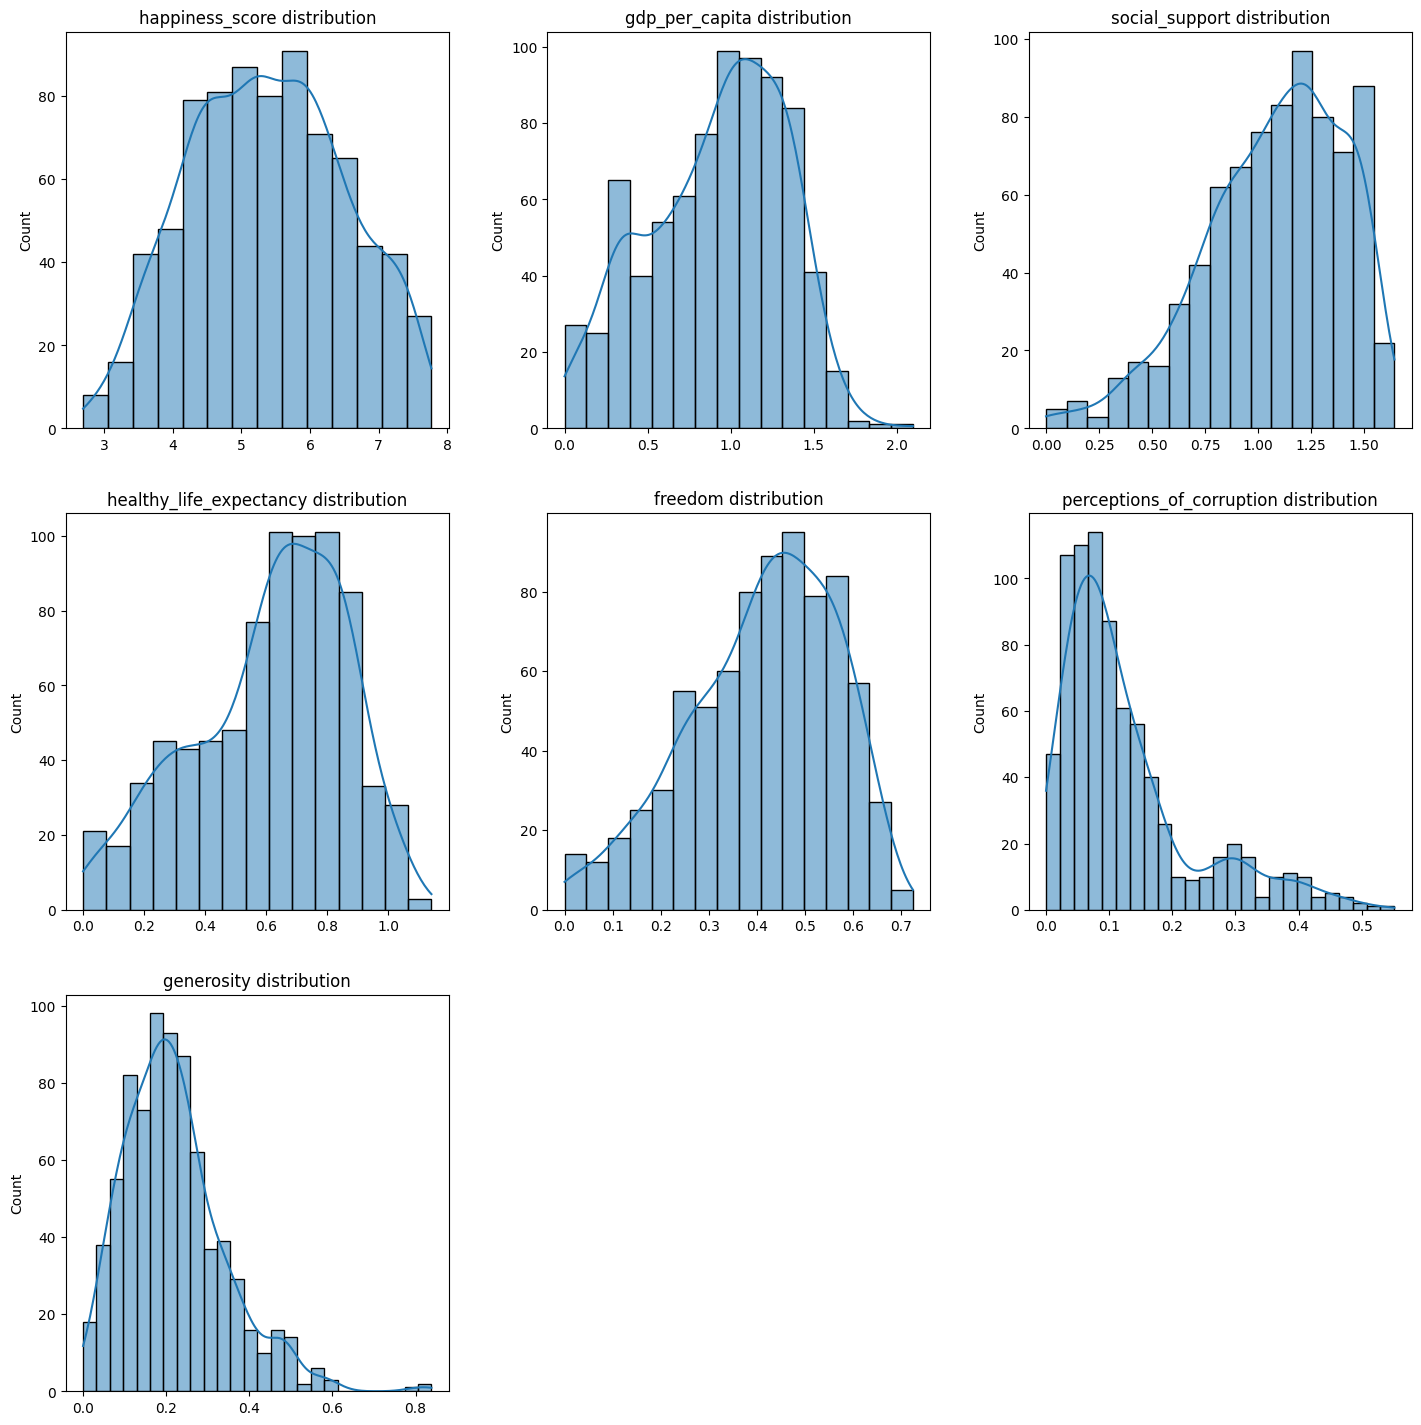

In [55]:
numeric_cols = df.select_dtypes(include='float').columns

n_cols = 3
n_rows = (len(numeric_cols)) // n_cols + (1 if len(numeric_cols) % n_cols else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.tight_layout(pad=4.0) 

axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes): 
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'{col} distribution')
        axes[i].set_xlabel('')
    
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.show()


The happiness score histogram reveals a right-skewed distribution, indicating that most countries have lower to middle-range happiness scores, with only a few achieving very high levels of well-being. Similarly, the distributions of GDP per capita, social support, healthy life expectancy, freedom to make life choices, and perception of corruption offer insights into their variability. GDP per capita and healthy life expectancy are both right-skewed, suggesting that while most countries fall in the lower to moderate range, a few outliers have significantly higher values, which likely contribute to higher happiness scores. Social support shows a more normal distribution with a slight right skew, indicating a fairly even spread across countries. Freedom to make life choices is slightly left-skewed, meaning most countries report higher freedom levels, while perception of corruption is left-skewed, highlighting that a majority of countries perceive higher corruption levels, potentially negatively impacting happiness.

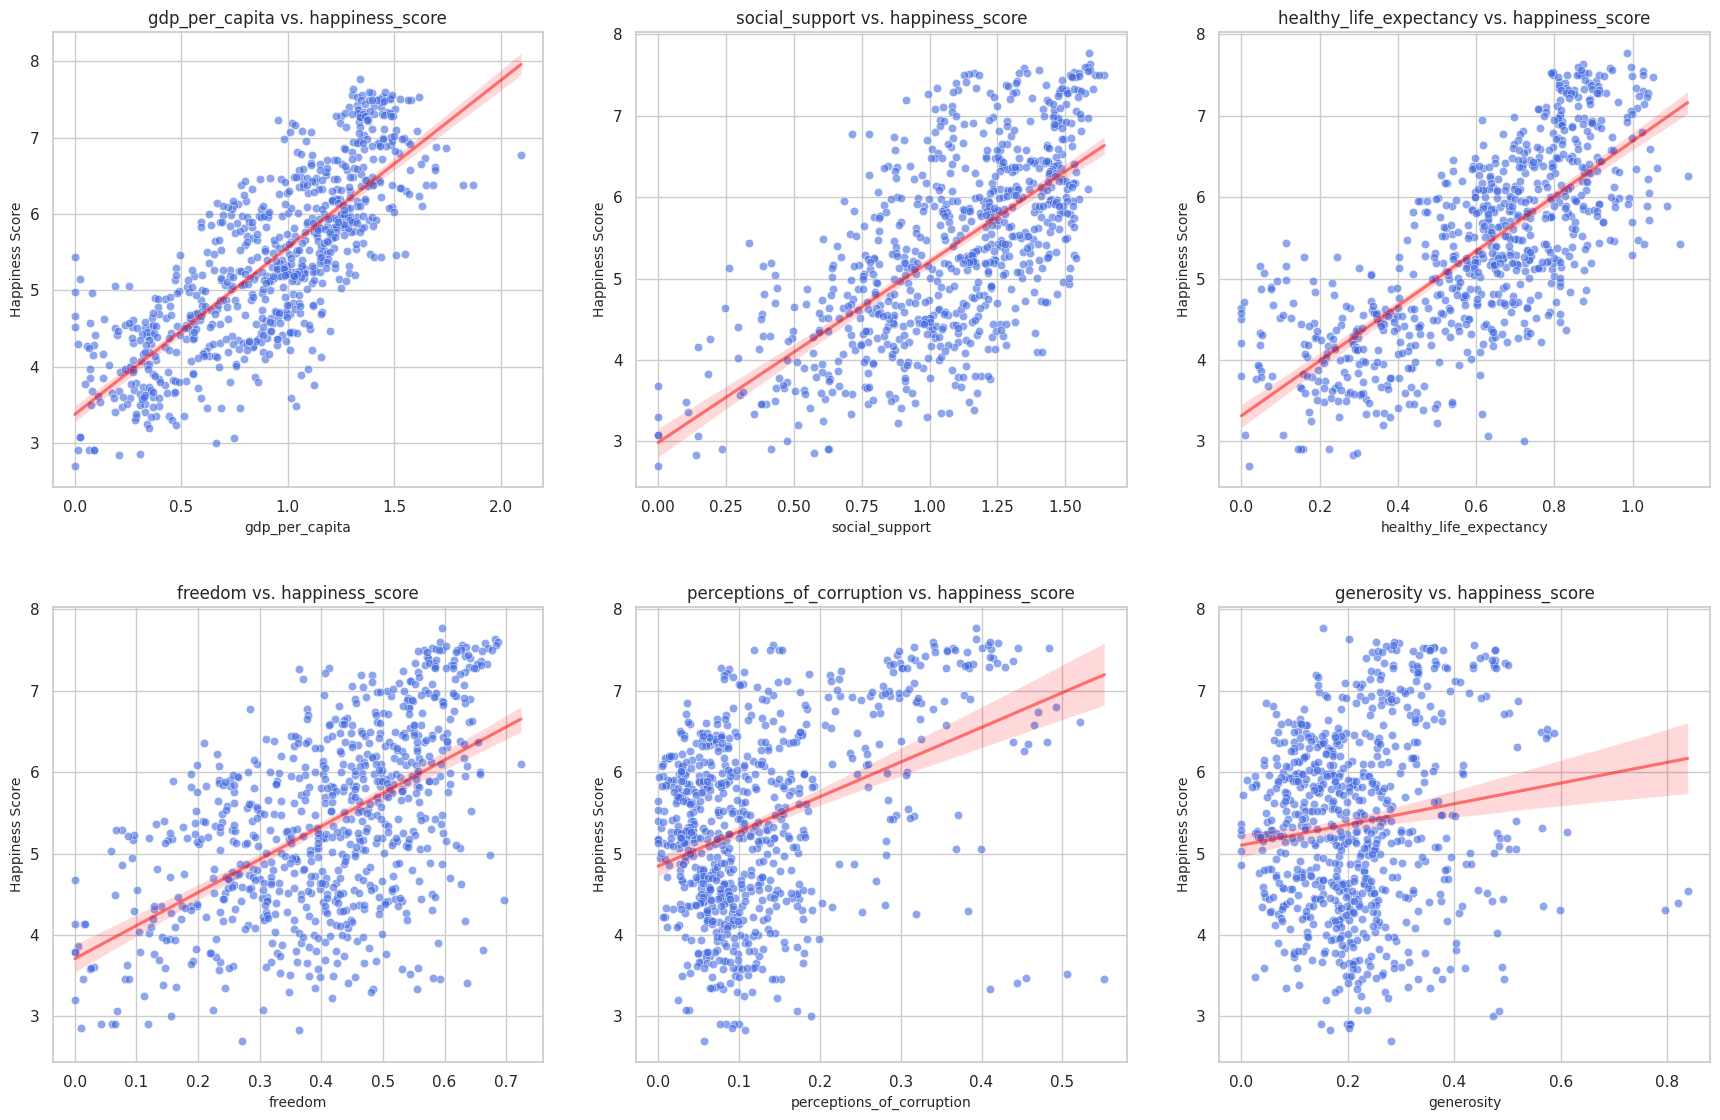

In [57]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

cols = df.columns[3:9] 

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i) 
    sns.scatterplot(data=df, x=col, y='happiness_score', alpha=0.6, color='royalblue')
    
    sns.regplot(data=df, x=col, y='happiness_score', 
                scatter=False, color='red', line_kws={'alpha':0.5})
    
    plt.title(f'{col} vs. happiness_score', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Happiness Score', fontsize=10)

plt.tight_layout(pad=3.0) 
plt.show()

The scatter plots illustrate the relationships between happiness scores and various factors. GDP per capita, social support, healthy life expectancy, and freedom to make life choices all show strong positive correlations with happiness scores, indicating that increases in these areas are associated with higher well-being. For instance, countries with higher GDP per capita or better social support systems tend to report greater happiness. Conversely, the perception of corruption shows a negative correlation, meaning that countries with lower perceived corruption tend to have higher happiness scores, highlighting corruption as a potential barrier to well-being. Generosity, however, shows only a weak positive correlation with happiness, suggesting that while it may contribute to happiness, its impact is less pronounced compared to the other factors. These correlations underscore the multifaceted nature of happiness, where economic, social, and governance factors play significant roles.

/tmp/ipykernel_89704/2515781275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='happiness_score', palette='pastel')


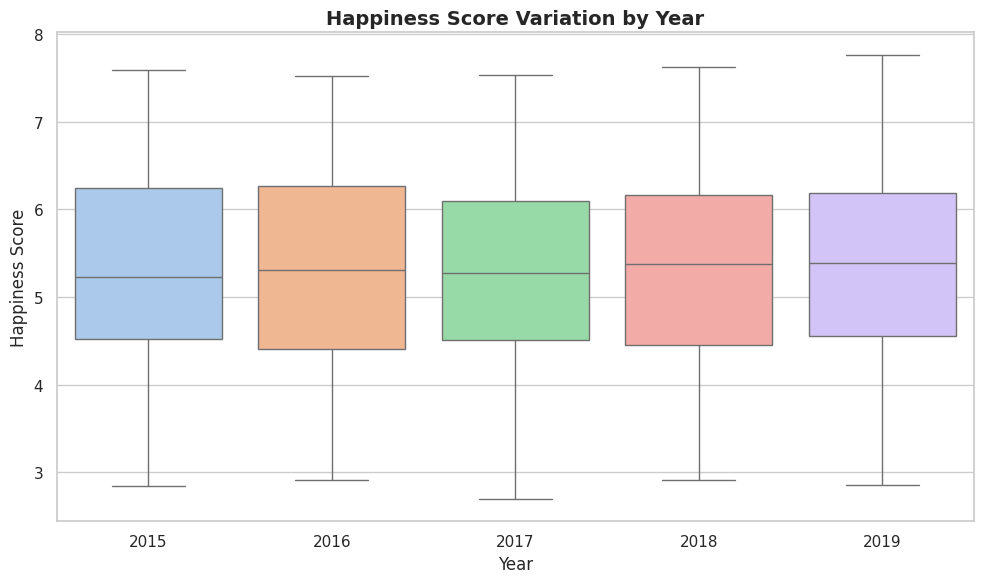

In [56]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='happiness_score', palette='pastel')

plt.title('Happiness Score Variation by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

plt.tight_layout()
plt.show()

Happiness score variation by year from 2015 to 2019 box plot shows stability in the median happiness score across this period, with slight fluctuations. The interquartile range remains consistent, suggesting that the spread of happiness scores among countries did not change dramatically year to year. This stability might indicate that global happiness levels are influenced by enduring factors rather than short-term changes during this timeframe. However, the presence of outliers in each year suggests that some countries consistently experience significantly higher or lower happiness scores compared to the global median.

##### ***Happiness trend per year***

<Axes: title={'center': 'Happiness Trend per Year'}, xlabel='year'>

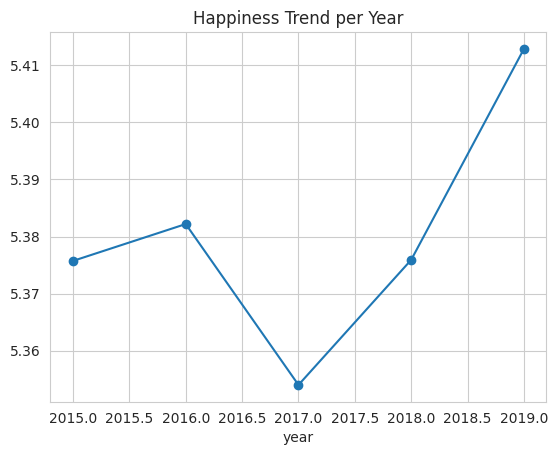

In [65]:
df.groupby('year')['happiness_score'].mean().plot(
    title='Happiness Trend per Year',
    marker='o'
)

This chart depicting the happiness trend per year from 2015 to 2019 shows an overall fluctuating pattern with a general upward trajectory. Starting at approximately 5.37 in mid-2015, the happiness score remained relatively stable, peaking slightly at 5.38 by mid-2016. However, it experienced a noticeable dip to around 5.36 by mid-2017, marking the lowest point in the observed period. Following this decline, the happiness score began to recover, rising to 5.38 by mid-2018, and continued to increase steadily, reaching 5.41 by mid-2019. This suggests that despite short-term fluctuations, there was a net positive trend in happiness scores over the four-year span, with the most significant improvement occurring after 2017.

##### ***Distribution of the happiness score by country and by region***

/tmp/ipykernel_89704/962426622.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=sorted_df, x='country', y='happiness_score',


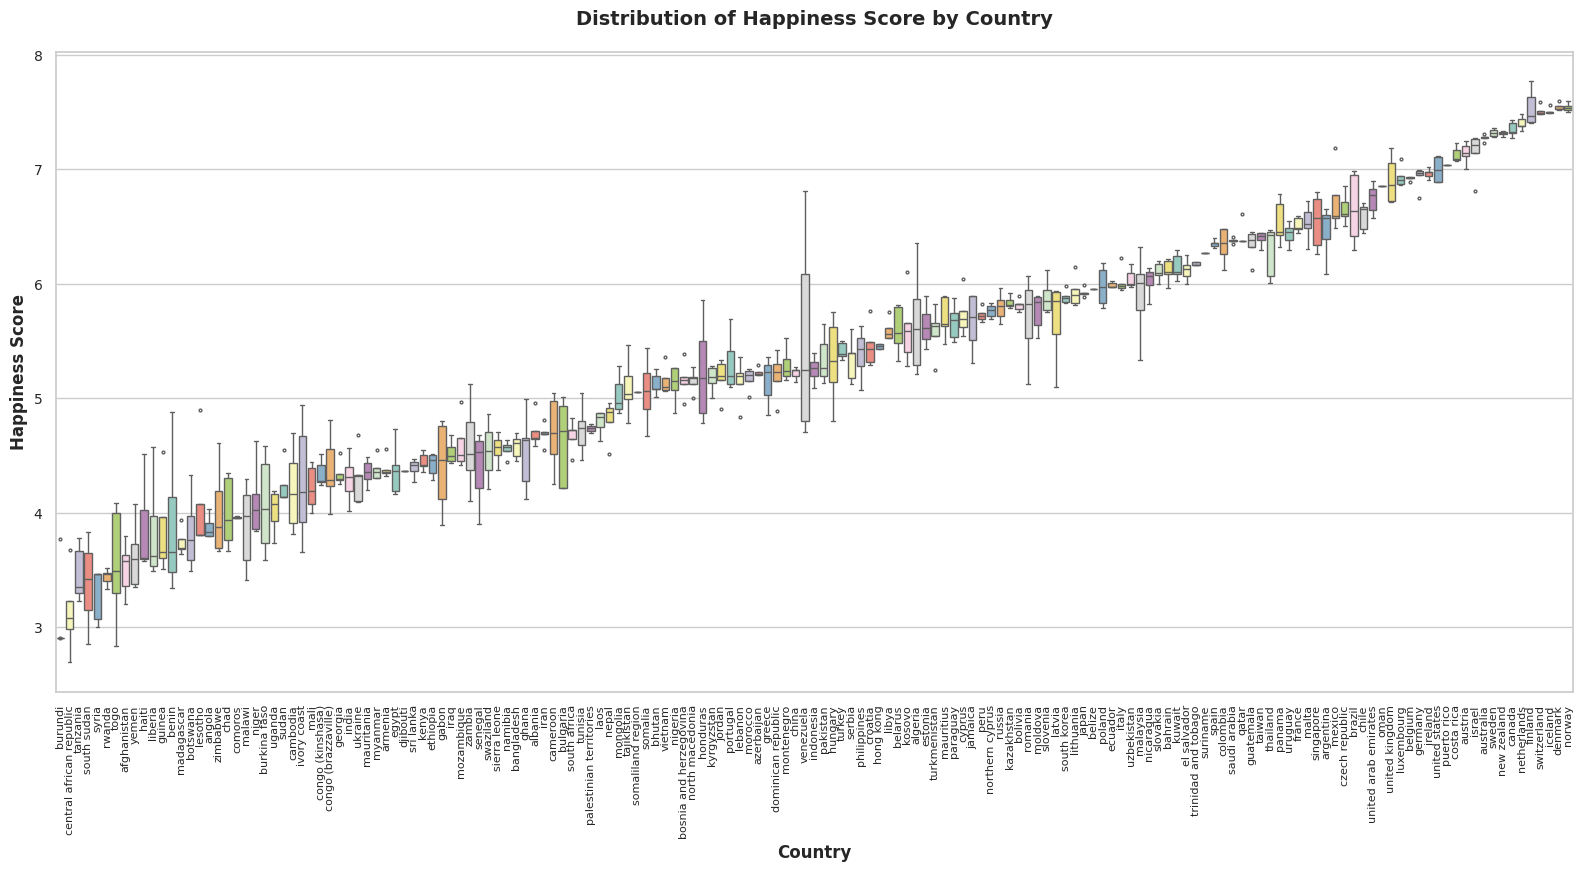

In [60]:
sns.set(style="whitegrid", rc={"figure.figsize":(16, 8)})
plt.figure(figsize=(16, 10))

sorted_countries = df.groupby('country')['happiness_score'].median().sort_values().index
sorted_df = df.set_index('country').loc[sorted_countries].reset_index()

ax = sns.boxplot(data=sorted_df, x='country', y='happiness_score', 
                 palette="Set3", linewidth=1, fliersize=2)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)
plt.xlabel("Country", fontsize=12, fontweight='bold')
plt.ylabel("Happiness Score", fontsize=12, fontweight='bold')
plt.title("Distribution of Happiness Score by Country", 
          fontsize=14, pad=20, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.3) 

plt.show()

The happiness scores generally span from approximately 3 to 7.5, with a clear upward trend from left to right. The majority of countries cluster around the middle range, roughly between 4 and 6, as evidenced by the dense concentration of box plots in this area. Some countries exhibit higher variability in their happiness scores, shown by wider boxes and longer whiskers, suggesting inconsistent well-being levels within those populations. The highest scores, approaching 7.5, are seen in a few countries, while the lowest, around 3, are found on the left, highlighting significant global disparities in happiness. This distribution underscores that while most countries experience moderate happiness, a small number stand out as either exceptionally happy or unhappy.

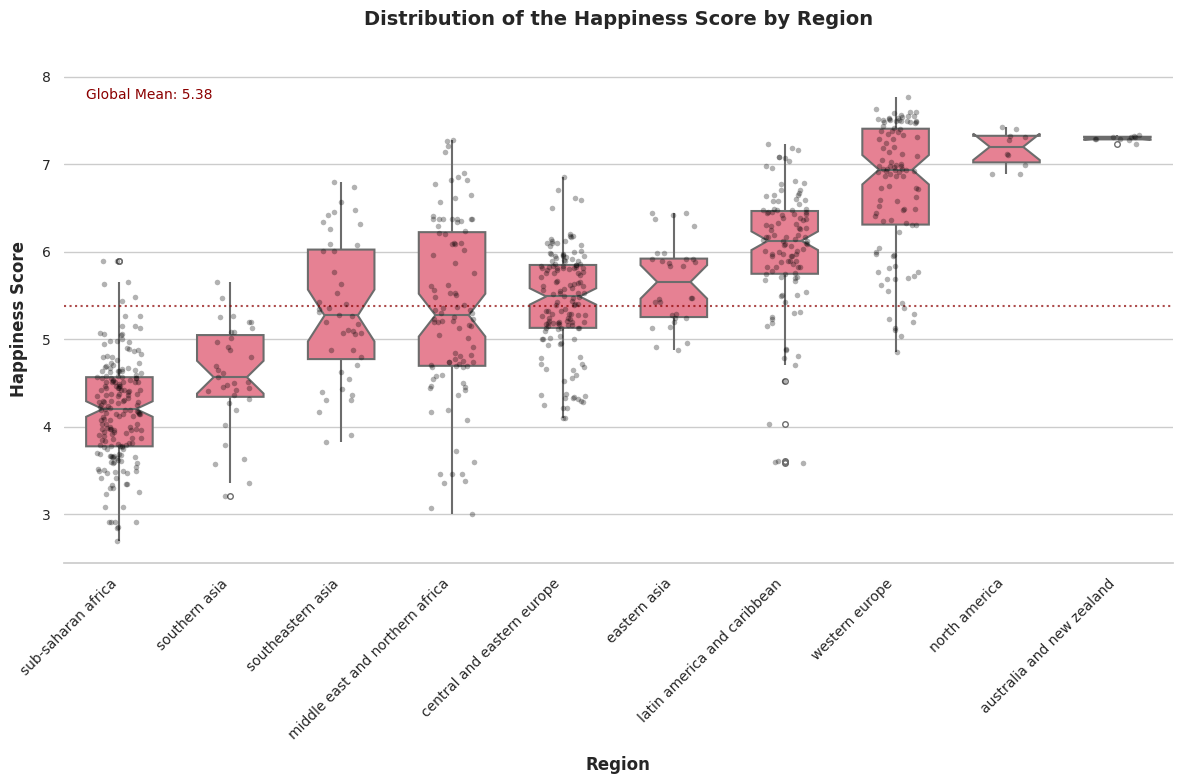

In [59]:
plt.style.use('seaborn-v0_8-pastel')
sns.set_palette("husl") 

plt.figure(figsize=(12, 8))

region_order = df.groupby('region')['happiness_score'].median().sort_values().index

ax = sns.boxplot(
    data=df,
    x='region',
    y='happiness_score',
    order=region_order,
    width=0.6,
    linewidth=1.5,
    fliersize=4,
    notch=True, 
    showcaps=False  
)

plt.title('Distribution of the Happiness Score by Region\n', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=12, labelpad=10, fontweight='bold')
plt.ylabel('Happiness Score', fontsize=12, labelpad=10, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

global_mean = df['happiness_score'].mean()
ax.axhline(global_mean, color='darkred', linestyle=':', alpha=0.7, linewidth=1.5)
ax.text(0.02, 0.95, f'Global Mean: {global_mean:.2f}', 
        transform=ax.transAxes, color='darkred', fontsize=10)

sns.stripplot(
    data=df,
    x='region',
    y='happiness_score',
    order=region_order,
    color='black',
    size=4,
    alpha=0.3,
    jitter=0.2
)

plt.tight_layout()
sns.despine(left=True) 

plt.show()

The regions vary significantly in their happiness levels, with scores ranging from approximately 4 to 7. The chart shows varying happiness score distributions across regions, with a global mean of 5.38. Sub-Saharan Africa and the Middle East have the lowest medians (~4.5), while North America, Australia, and New Zealand lead with the highest (~7). Eastern Asia, Latin America, and Western Europe fall in the middle (5.5-6.5), with regional disparities evident in median scores and variability.

##### ***Outlier detection by column (for numerical columns)***

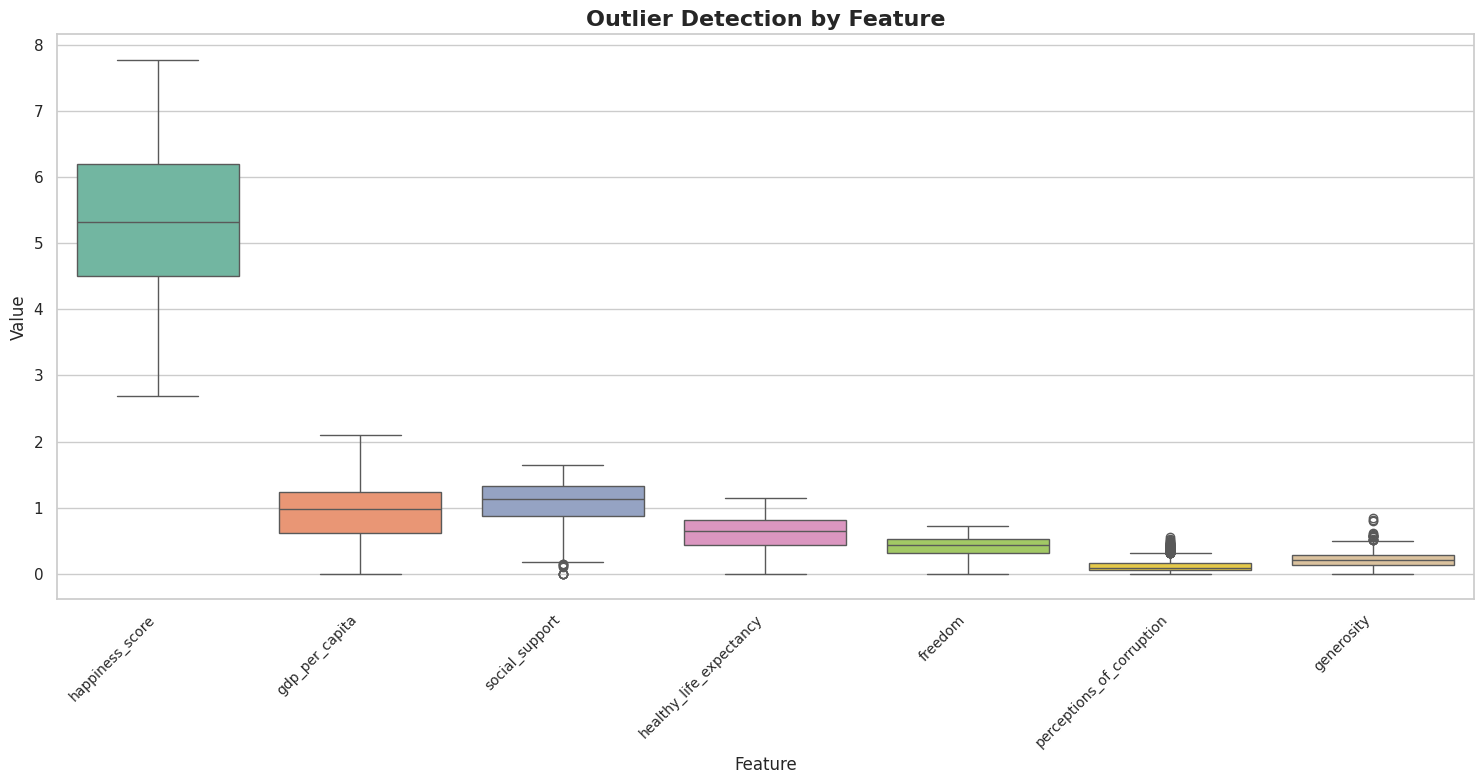

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))

sns.boxplot(data=df[numeric_cols], palette='Set2')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Outlier Detection by Feature', fontsize=16, fontweight='bold')
plt.ylabel('Value', fontsize=12)
plt.xlabel('Feature', fontsize=12)

plt.tight_layout()
plt.show()

The chart on outlier detection for numerical features shows that Happiness Score has the most outliers, with values ranging from approximately 4 to 7 and several points extending beyond the whiskers. GDP per Capita, Social Support, and Healthy Life Expectancy each have a few outliers, with ranges mostly between 0 and 1.5. Freedom, Perceptions of Corruption, and Generosity show minimal outliers, with tight ranges around 0 to 0.5, indicating more consistent data distributions for these features. Happiness Score's higher outlier count suggests greater variability in well-being across the dataset.

##### ***Correlation analysis of numerical variables***

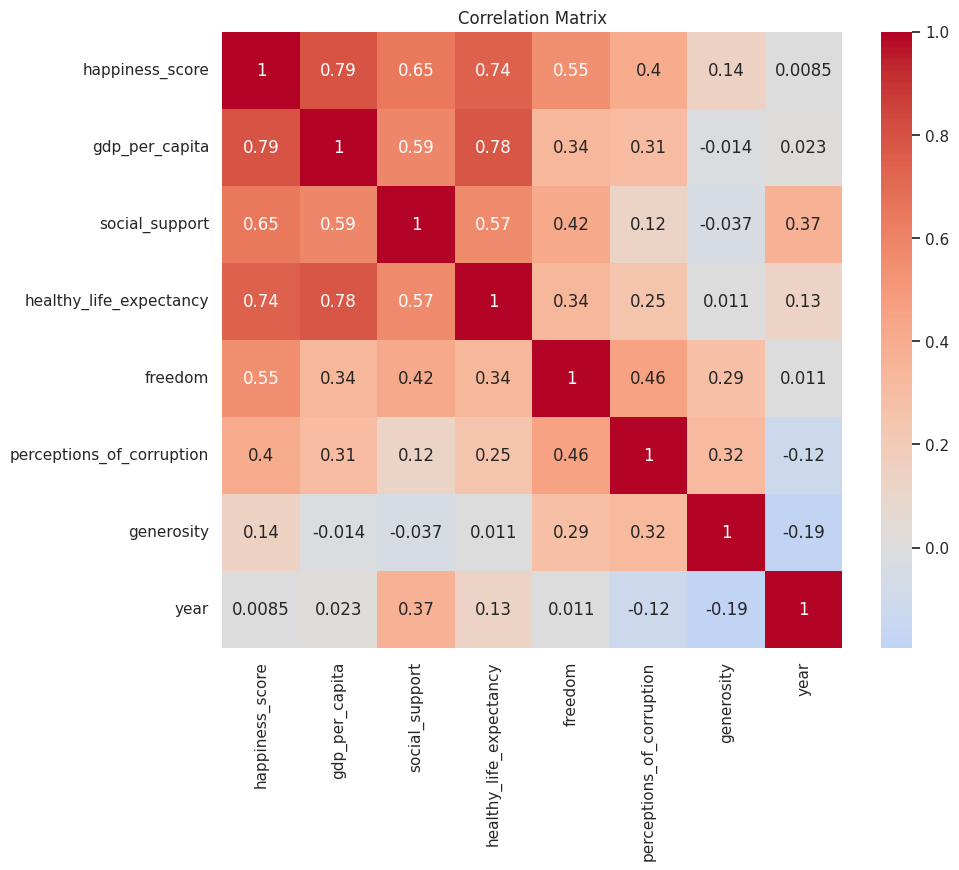

In [ ]:
cols = df.select_dtypes(include=['float', 'int']).columns
corr_matrix = df[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

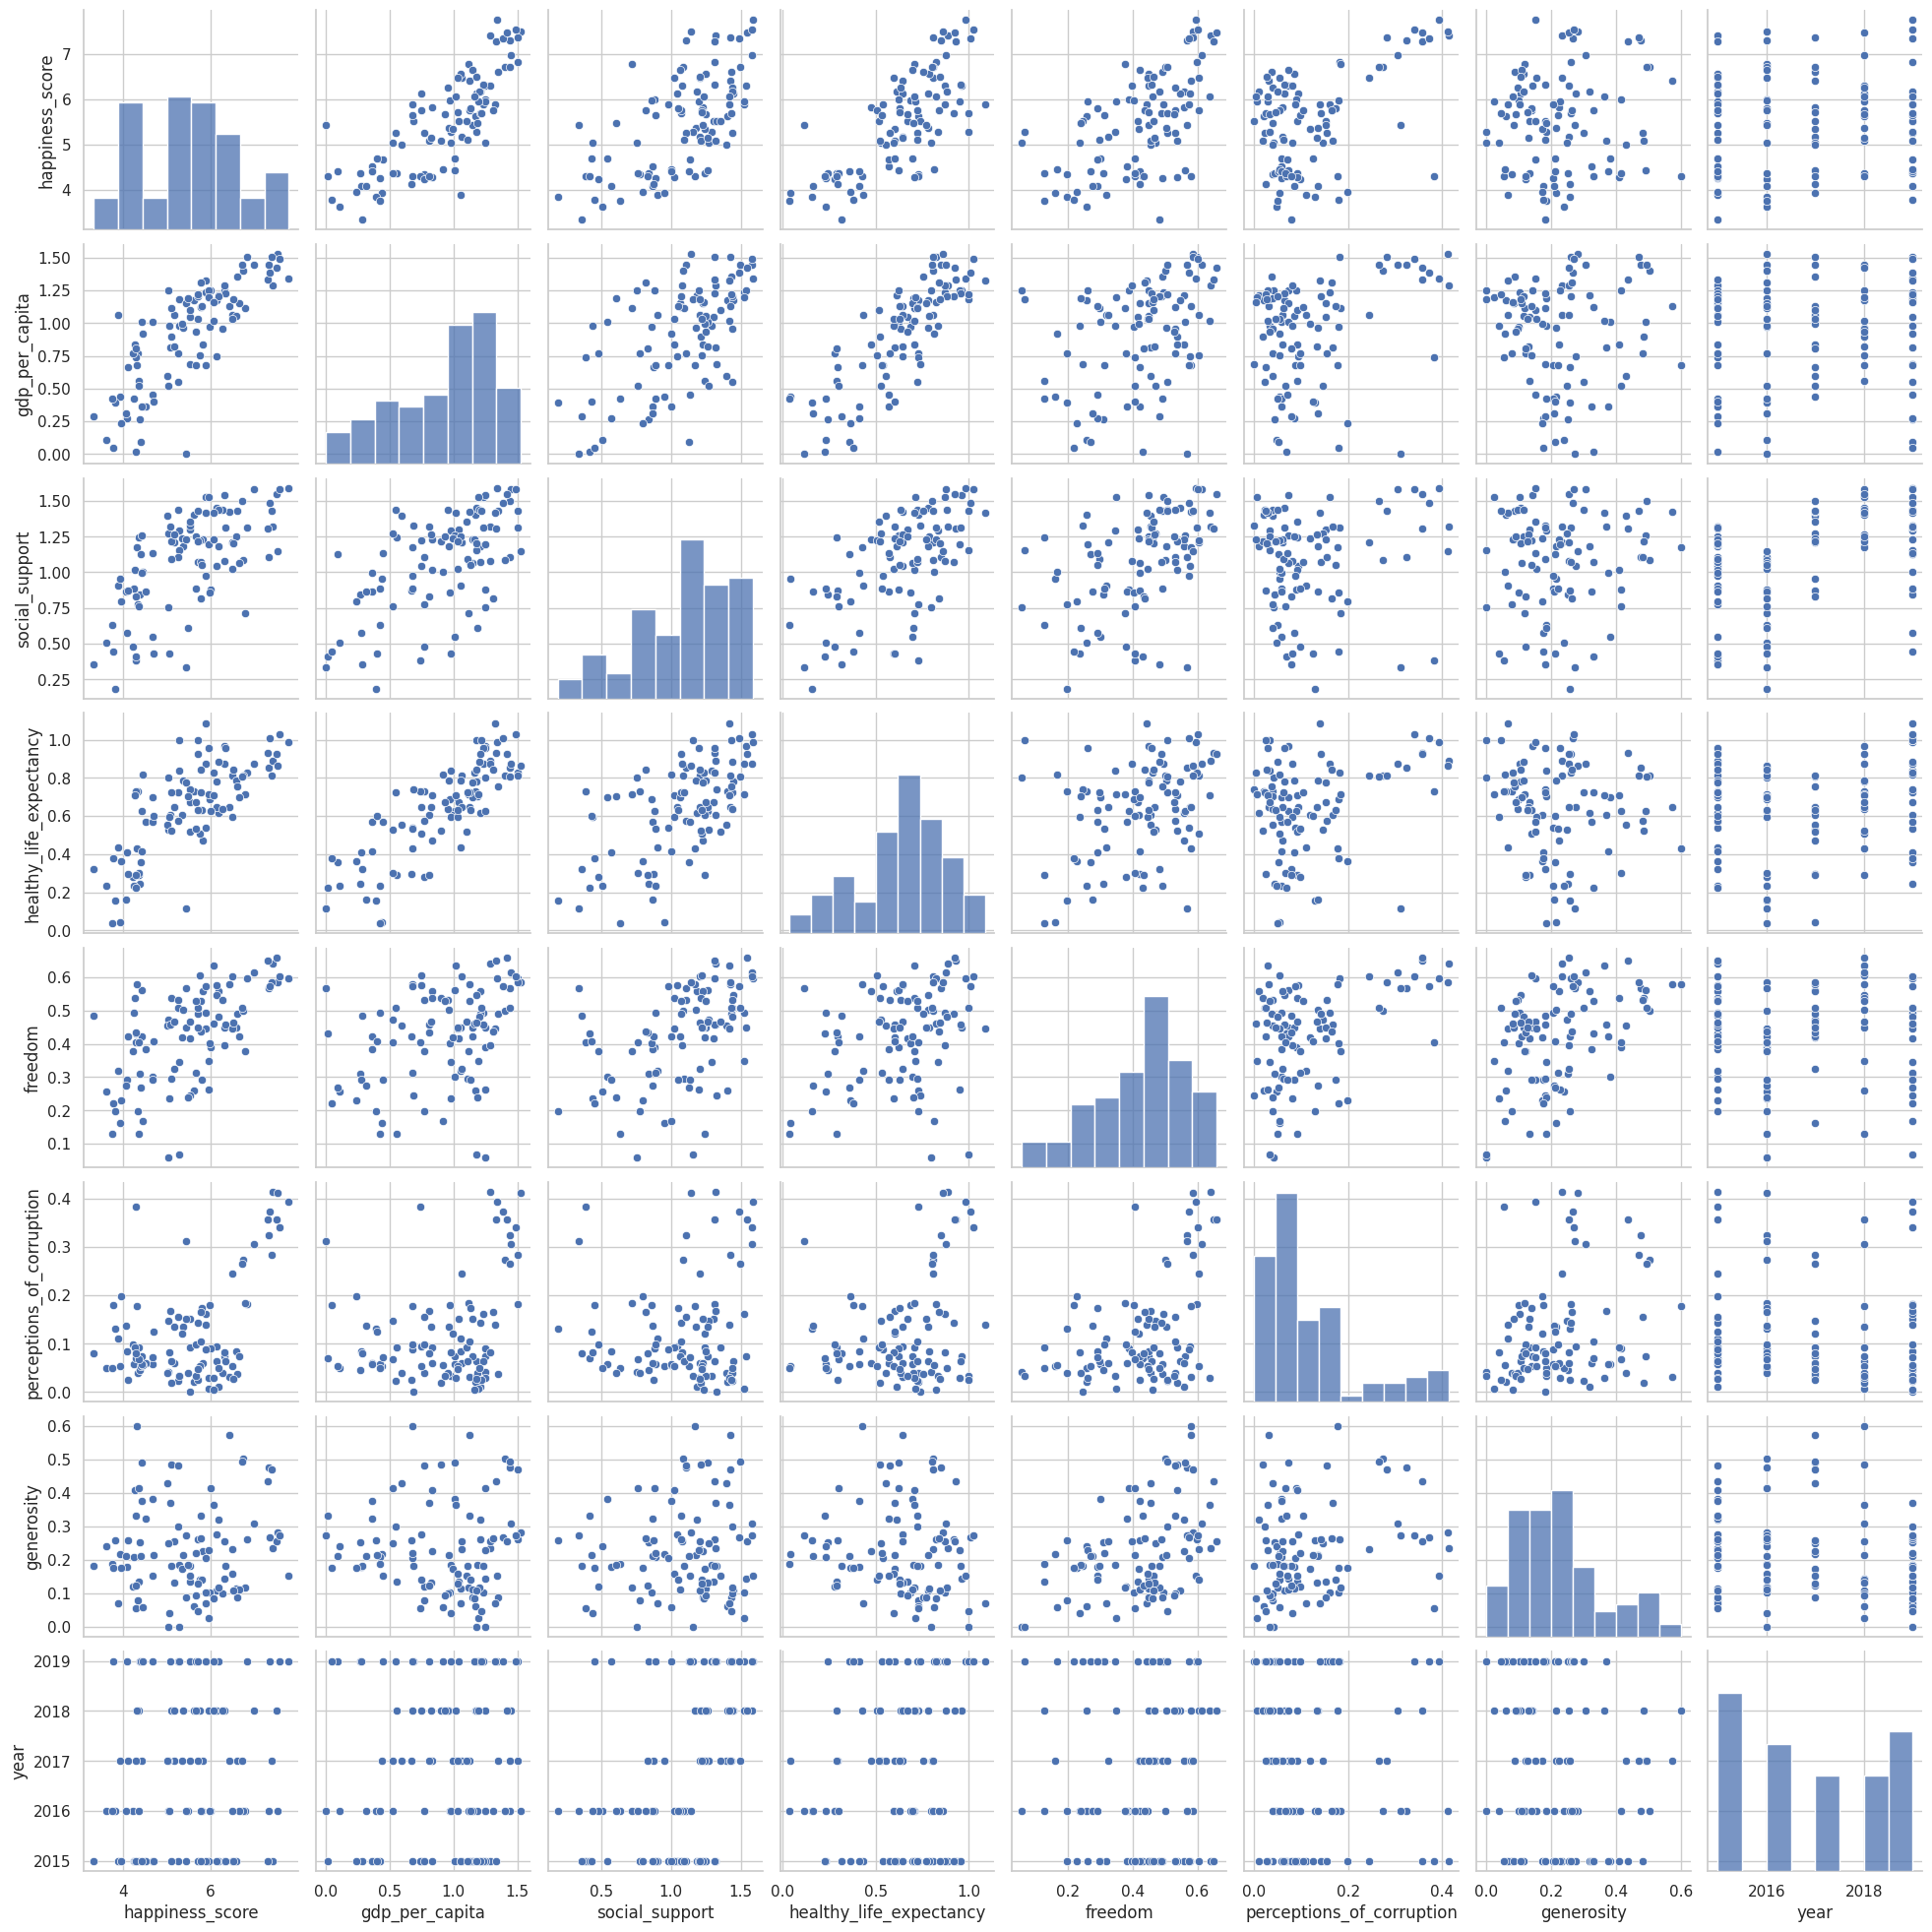

In [78]:
sample_df = df.sample(100) if len(df) > 100 else df
sns.pairplot(sample_df[cols])
plt.show()

The correlation analysis of numerical variables reveals strong positive relationships among several factors influencing happiness. The happiness score shows the highest correlation with GDP per capita (0.79), social support (0.65), healthy life expectancy (0.74), and freedom (0.55), indicating these factors significantly contribute to well-being. Social support also correlates strongly with healthy life expectancy (0.57) and GDP per capita (0.59), suggesting interconnected socio-economic benefits. Perceptions of corruption have a moderate positive correlation with freedom (0.46) but a weak negative correlation with generosity (-0.19) and year (-0.12), hinting at a slight improvement in corruption perception over time. Generosity shows the weakest correlations overall, with a slight positive link to freedom (0.32) and a negative link to year (-0.19). The scatter plots and histograms on the right confirm these trends, with dense clusters and peaked distributions supporting the strength of these relationships.

##### ***Analysis of variance of the DataFrame columns***

══════════════════════════════════════════════════════════════════════
                 VARIANCE ANALYSIS (Threshold = 0.1)                  
══════════════════════════════════════════════════════════════════════
                 Variable  Variance  Checks_Threshold  Threshold
           gdp_per_capita  0.165452              True        0.1
           social_support  0.108577              True        0.1
  healthy_life_expectancy  0.061614             False        0.1
                  freedom  0.023371             False        0.1
               generosity  0.014959             False        0.1
perceptions_of_corruption  0.011239             False        0.1


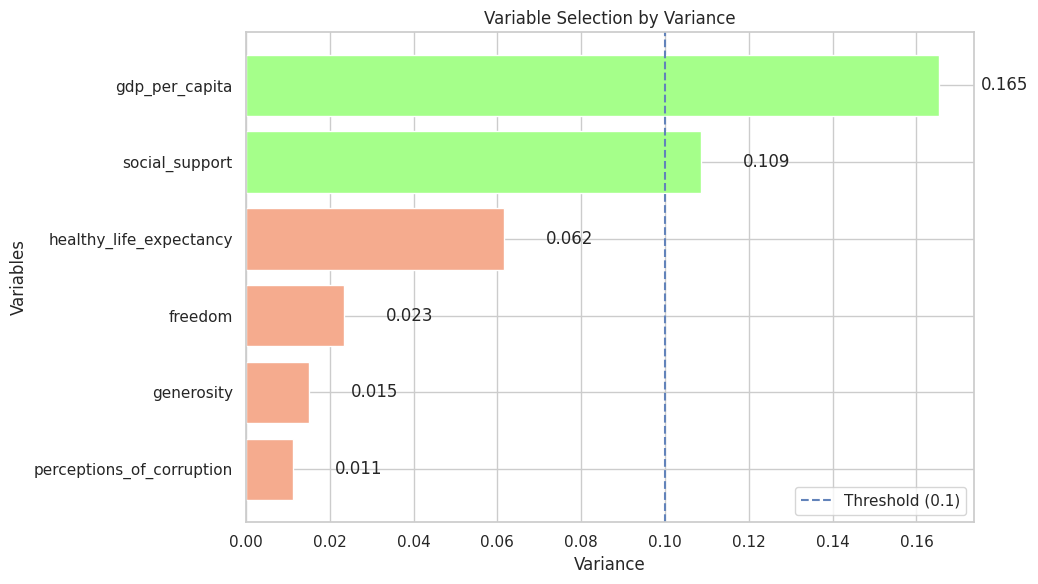

In [64]:
threshold = 0.1
selected_columns = df.columns[3:9] 
var_thresh = VarianceThreshold(threshold=threshold)
var_thresh.fit(df[selected_columns])

results = pd.DataFrame({
    'Variable': selected_columns,
    'Variance': var_thresh.variances_,
    'Checks_Threshold': var_thresh.get_support(),
    'Threshold': threshold
})

results = results.sort_values('Variance', ascending=False)

print("═"*70)
print(f"VARIANCE ANALYSIS (Threshold = {threshold})".center(70))
print("═"*70)
print(results.to_string(index=False))


plt.figure(figsize=(10, 6))
bars = plt.barh(results['Variable'], results['Variance'], 
                color=results['Checks_Threshold'].map({True: '#a5ff8a', False: '#f5ab8e'}))
plt.axvline(threshold, color='#6283ba', linestyle='--', label=f'Threshold ({threshold})')
plt.title('Variable Selection by Variance')
plt.xlabel('Variance')
plt.ylabel('Variables')
plt.legend()
plt.gca().invert_yaxis() 
plt.tight_layout()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center')

plt.show()

The analysis of variance for the dataframe columns shows that GDP per capita has the highest variance at 0.165, indicating significant variability and potentially the most influential factor. Social support follows with a variance of 0.109, suggesting notable but lesser variability. Healthy life expectancy has a variance of 0.062, while freedom, generosity, and perceptions of corruption exhibit lower variances at 0.023, 0.015, and 0.011, respectively, indicating more consistency in these measures. With a threshold of 0.11, only GDP per capita and social support exceed this cutoff, highlighting them as key variables for further analysis due to their higher variability.

##### ***Analysis of important columns using SelectKBest with f_regression***

In [ ]:
X = df.drop(columns=['country', 'region', 'happiness_score'])
y = df['happiness_score']

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

for col, score in zip(X.columns, selector.scores_):
    print(f"{col}: {score:.2f}")

gdp_per_capita: 1286.79
social_support: 565.99
healthy_life_expectancy: 955.82
freedom: 340.13
perceptions_of_corruption: 149.05
generosity: 15.13
year: 0.06


This analysis highlights the relative importance of various features in predicting happiness scores. GDP per capita stands out with the highest score of 1286.79, indicating it is the most significant predictor of happiness. Social support follows with a score of 565.99, suggesting a strong influence on well-being. Healthy life expectancy ranks third with 955.82, reinforcing its substantial role in determining happiness. Freedom scores 340.13, showing a moderate but notable impact. Perceptions of corruption, with a score of 149.05, and generosity, at 15.13, have lower influences, indicating they are less critical predictors. The year, with a negligible score of 0.06, appears to have almost no effect on happiness scores. This ranking suggests that economic factors (GDP per capita), health (healthy life expectancy), and social factors (social support) are the primary drivers of happiness, while corruption, generosity, and time have minimal impact based on this analysis.

##### ***Data export***

Data is saved into the data folder to be used by the models to be trained

In [ ]:
df.to_csv("data/merged_data.csv", index= False)